In [168]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [169]:
n = 100     #formerly grid_size
grid = np.zeros([n, n], dtype=int)

separation_factor = 2/3     # horizontal separation of the plates
vertical_aspect = 0.8   # amount of vertical grid_size taken up by plate

y1 = int(0.5*n*(1 - vertical_aspect))
y2 = int(0.5*n*(1 + vertical_aspect))
assert 0 <= separation_factor <= 1
assert 0 <= vertical_aspect <= 1
offset = int(separation_factor * (n//2))
grid[y1:y2, offset] = 1
grid[y1:y2, n-offset-1] = -1

In [170]:
adjacency = np.zeros([n*n, n*n], dtype=int)
for i in range(n*n):
    x1 = i // n
    x2 = i % n
    for j in range(n*n):
        y1 = j // n
        y2 = j % n

        if np.abs(x1-y1) + np.abs(x2 - y2) == 1:
            adjacency[i, j] = 1

In [171]:
degree = np.zeros_like(adjacency)


for i in range(n*n):

    x1 = i // n
    x2 = i % n
    deg = 4 - (x1 % (n-1) == 0) - (x2 % (n-1) == 0)
    degree[i, i] = deg

In [274]:
laplacian = (degree - adjacency)
L1 = (laplacian @ grid.flatten()).reshape(100, 100)

In [275]:
np.nonzero(laplacian[2, :])

(array([  1,   2,   3, 102], dtype=int64),)

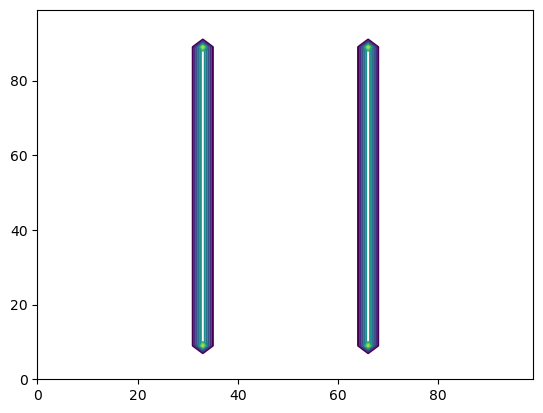

In [276]:
plt.contour(np.abs(L1))
plt.show()

In [277]:
L1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [278]:
laplacian

array([[ 2, -1,  0, ...,  0,  0,  0],
       [-1,  3, -1, ...,  0,  0,  0],
       [ 0, -1,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3, -1,  0],
       [ 0,  0,  0, ..., -1,  3, -1],
       [ 0,  0,  0, ...,  0, -1,  2]])